<a href="https://colab.research.google.com/github/rockey1006/Variational-Autoencoders/blob/master/lfwA_AB1111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/rockey1006/facenet.git
!pip uninstall tensorflow
!pip install tensorflow==1.13.2
!pip install scipy==1.2.1
!pip install facenet

In [3]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/20170708-150701.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/facenet/cnn')

In [4]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/need.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/facenet/need')

In [5]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/list.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/facenet/list')

In [10]:
!python facenet/src/generative/calculate_attribute_vectors.py \
facenet.src.generative.models.dfc_vae \
/content/facenet/cnn/20170708-150701/model.ckpt-50000 \
/content/facenet/need/need \
--annotations_filename /content/facenet/list/list.txt \
--output_filename attribute.h5 \
--batch_size 128 \
--image_size 160 \
--latent_var_size 100

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [11]:
import h5py
f = h5py.File('/content/attribute.h5' , 'r')
f.keys()
print([key for key in f.keys()])

['attribute_vectors', 'attributes', 'fields', 'latent_vars']


In [12]:

print(f['latent_vars'][0])
print(f['latent_vars'][0].shape)
print(f['latent_vars'][:].shape)

[  5.8710804  -13.39270496  -9.57736397  -8.27650642  10.55366802
  12.37693691  -7.94004059   6.25898123  11.6896944   -8.47481251
  13.65985584 -16.93122864  -1.51378644   5.32503128   3.58321118
   5.48609972   6.13090467 -12.41089535  -0.49593148  12.13209152
  16.71437645  -7.4815855   -6.42416811 -10.68782997  15.61964798
   2.78240609  19.45796394   4.91779041   1.65584862   0.79058248
 -17.41474724  -2.64907837  -2.58149099   5.26827288  19.4272747
   1.4115324   -2.54459167  10.97094154  -1.49146914  -0.38831151
   2.47879791   5.28145266  -9.26039886   5.16349745   6.77287531
   5.59955454  -4.81239748  -1.77091825  -0.8565051   -0.97669506
 -11.12304688  13.52102566 -14.74749756  17.36725807  -0.5276584
  -4.40035486   1.09977317 -19.14251137  12.5318737    5.61397028
   6.29306555  -2.60762048   5.31709766  -7.98745155  -7.12555838
  20.81910515  22.29375076   7.74027205  -7.5472188    2.96443176
  -0.73816526 -10.88233566  23.81600761   6.8811202    8.68315983
 -15.0676660

In [541]:
!python facenet/src/generative/modify_attribute.py \
facenet.src.generative.models.dfc_vae \
/content/facenet/cnn/20170708-150701/model.ckpt-50000 \
/content/facenet/cnn/20170708-150701/attribute_vectors.h5 \
/content/attribute.h5  \
/content/facenet/add6.png  \

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

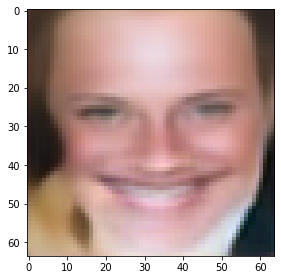

In [542]:
from skimage import data, io

img = io.imread("/content/facenet/add6.png")
io.imshow(img)

io.show()

In [ ]:

!zip -r /content/facenet.zip /content/facenet

In [544]:
from google.colab import files
files.download("/content/facenet.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>